In [34]:
!pip install patchify

In [35]:
import os
from glob import glob
import numpy as np
from matplotlib import pyplot as plt
from patchify import patchify, unpatchify
import cv2

In [36]:
data_dir = '/content/drive/MyDrive/Stage/Stage_Falcon/Dataset_2'

In [37]:
images = sorted(glob(os.path.join(data_dir,'*.png')))
print(images)

['/content/drive/MyDrive/Stage/Stage_Falcon/Dataset_2/W0003_0001.png', '/content/drive/MyDrive/Stage/Stage_Falcon/Dataset_2/W0003_0002.png', '/content/drive/MyDrive/Stage/Stage_Falcon/Dataset_2/W0003_0003.png', '/content/drive/MyDrive/Stage/Stage_Falcon/Dataset_2/W0003_0004.png', '/content/drive/MyDrive/Stage/Stage_Falcon/Dataset_2/W0003_0005.png', '/content/drive/MyDrive/Stage/Stage_Falcon/Dataset_2/W0003_0006.png', '/content/drive/MyDrive/Stage/Stage_Falcon/Dataset_2/W0003_0007.png', '/content/drive/MyDrive/Stage/Stage_Falcon/Dataset_2/W0003_0008.png', '/content/drive/MyDrive/Stage/Stage_Falcon/Dataset_2/W0003_0009.png', '/content/drive/MyDrive/Stage/Stage_Falcon/Dataset_2/W0003_0010.png', '/content/drive/MyDrive/Stage/Stage_Falcon/Dataset_2/W0003_0011.png', '/content/drive/MyDrive/Stage/Stage_Falcon/Dataset_2/W0003_0012.png', '/content/drive/MyDrive/Stage/Stage_Falcon/Dataset_2/W0003_0013.png', '/content/drive/MyDrive/Stage/Stage_Falcon/Dataset_2/W0003_0014.png', '/content/drive/MyD

**Debut Test**


---



In [43]:

img_path=images[0]
large_img=cv2.imread(img_path)
print(large_img.shape)
large_img=cv2.resize(large_img,(3360,672))
print(large_img.shape)
large_img =large_img[224:224*3,:,:]
patches = patchify(large_img, (224, 224,3),step=224)
print(patches.shape)
patches_img=patches.reshape(2,15,-1, 224, 3)
print(patches_img.shape)
lst=[]
l=0
for i in range(patches_img.shape[0]):
  for j in range(patches_img.shape[1]):
    l=l+1
    single_patch = patches_img[i,j]
    lst.append({'id_patch': (i,j),
                'patch' : single_patch,
                'x' : j*224,
                'y' : i*224,
                })

(1240, 4984, 3)
(672, 3360, 3)
(2, 15, 1, 224, 224, 3)
(2, 15, 224, 224, 3)


In [44]:
print(len(lst))

30


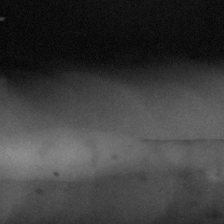

{'id_patch': (0, 10), 'patch': array([[[15, 15, 15],
        [12, 12, 12],
        [ 8,  8,  8],
        ...,
        [21, 21, 21],
        [17, 17, 17],
        [15, 15, 15]],

       [[16, 16, 16],
        [12, 12, 12],
        [15, 15, 15],
        ...,
        [13, 13, 13],
        [14, 14, 14],
        [14, 14, 14]],

       [[14, 14, 14],
        [13, 13, 13],
        [10, 10, 10],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [17, 17, 17]],

       ...,

       [[66, 66, 66],
        [67, 67, 67],
        [69, 69, 69],
        ...,
        [51, 51, 51],
        [53, 53, 53],
        [51, 51, 51]],

       [[65, 65, 65],
        [65, 65, 65],
        [69, 69, 69],
        ...,
        [57, 57, 57],
        [50, 50, 50],
        [50, 50, 50]],

       [[65, 65, 65],
        [64, 64, 64],
        [68, 68, 68],
        ...,
        [49, 49, 49],
        [48, 48, 48],
        [45, 45, 45]]], dtype=uint8), 'x': 2240, 'y': 0}


In [45]:
#print(lst)
from google.colab.patches import cv2_imshow
cv2_imshow(lst[10]['patch'])
print(lst[10])

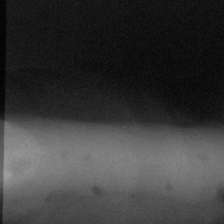

{'id_patch': (1, 0), 'patch': array([[[ 6,  6,  6],
        [ 7,  7,  7],
        [ 9,  9,  9],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [25, 25, 25]],

       [[ 7,  7,  7],
        [11, 11, 11],
        [10, 10, 10],
        ...,
        [26, 26, 26],
        [20, 20, 20],
        [14, 14, 14]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [25, 25, 25],
        [20, 20, 20],
        [15, 15, 15]],

       ...,

       [[23, 23, 23],
        [24, 24, 24],
        [47, 47, 47],
        ...,
        [55, 55, 55],
        [51, 51, 51],
        [55, 55, 55]],

       [[20, 20, 20],
        [24, 24, 24],
        [43, 43, 43],
        ...,
        [54, 54, 54],
        [51, 51, 51],
        [52, 52, 52]],

       [[18, 18, 18],
        [21, 21, 21],
        [41, 41, 41],
        ...,
        [51, 51, 51],
        [49, 49, 49],
        [48, 48, 48]]], dtype=uint8), 'x': 0, 'y': 224}


In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(lst[15]['patch'])
print(lst[15])

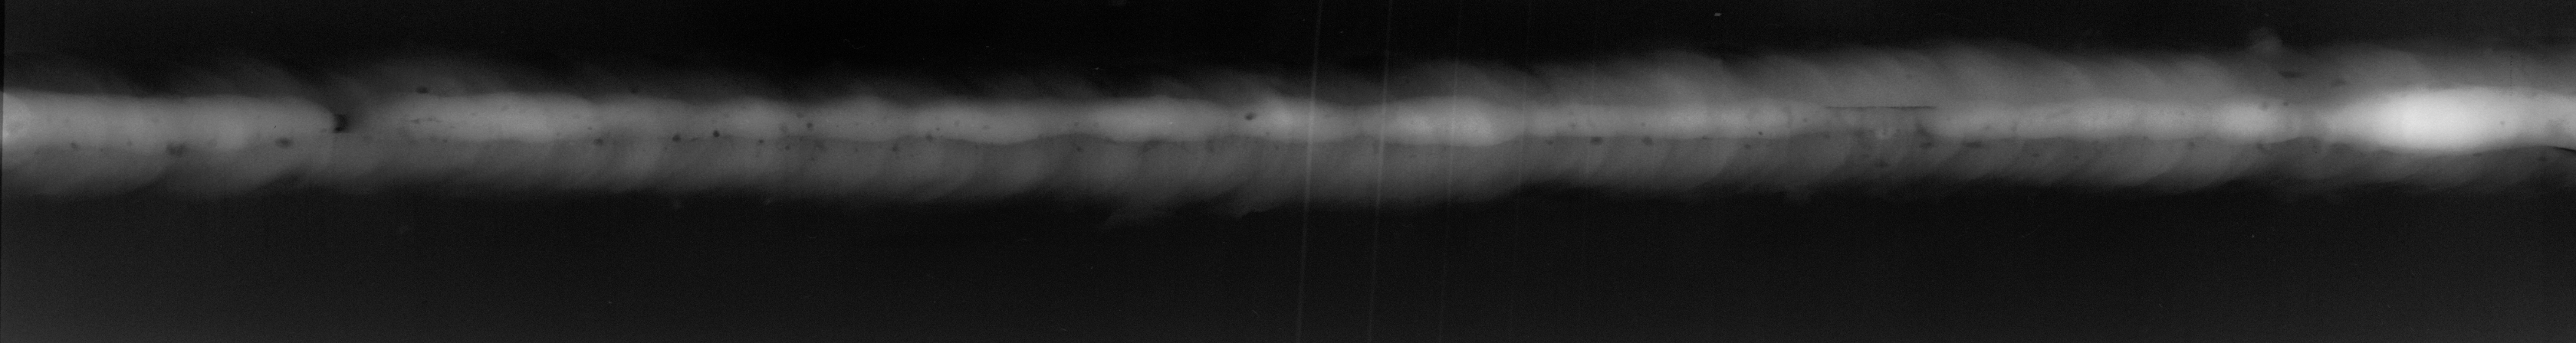

In [46]:
reconstructed_image = unpatchify(patches, large_img.shape)
cv2_imshow(reconstructed_image)

**Fin test**


---


In [49]:
k=0
l=0
for img_path in images:
  large_img=cv2.imread(img_path)
  large_img=cv2.resize(large_img,(3360,672))
  large_img =large_img[224:224*3,:,:]
  patches = patchify(large_img, (224, 224,3),step=224)
  patches_img=patches.reshape(2,15,-1, 224, 3)
  lst_img=[]
  k=k+1
  path = os.path.join('/content/drive/MyDrive/Stage/Stage_Falcon/patches',f'image{k}')
  os.makedirs(path, exist_ok=True)
  l=0
  lst_patches=[]
  for i in range(patches_img.shape[0]):
    for j in range(patches_img.shape[1]):
      l=l+1
      single_patch = patches_img[i,j]
      lst_patches.append({'id_patch': (i,j),
                  'patch' : single_patch,
                  'x' : j*224,
                  'y' : i*224,
                  })
      p = 'patch_' + str(l)+'.png'
      subpath=os.path.join(path,p)
      print(subpath)
      boo = cv2.imwrite(subpath, single_patch)
      print(boo)
  print(f'{l}patches')
  print('fin',f'{k} ème image')


/content/drive/MyDrive/Stage/Stage_Falcon/patches/image1/patch_1.png
True
/content/drive/MyDrive/Stage/Stage_Falcon/patches/image1/patch_2.png
True
/content/drive/MyDrive/Stage/Stage_Falcon/patches/image1/patch_3.png
True
/content/drive/MyDrive/Stage/Stage_Falcon/patches/image1/patch_4.png
True
/content/drive/MyDrive/Stage/Stage_Falcon/patches/image1/patch_5.png
True
/content/drive/MyDrive/Stage/Stage_Falcon/patches/image1/patch_6.png
True
/content/drive/MyDrive/Stage/Stage_Falcon/patches/image1/patch_7.png
True
/content/drive/MyDrive/Stage/Stage_Falcon/patches/image1/patch_8.png
True
/content/drive/MyDrive/Stage/Stage_Falcon/patches/image1/patch_9.png
True
/content/drive/MyDrive/Stage/Stage_Falcon/patches/image1/patch_10.png
True
/content/drive/MyDrive/Stage/Stage_Falcon/patches/image1/patch_11.png
True
/content/drive/MyDrive/Stage/Stage_Falcon/patches/image1/patch_12.png
True
/content/drive/MyDrive/Stage/Stage_Falcon/patches/image1/patch_13.png
True
/content/drive/MyDrive/Stage/Stage

**Load Model**


---



In [ ]:
import torch
import torch.nn as nn

In [ ]:
import torch

# Define your model architecture
class MyModel(torch.nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        # Define your model layers here

# Instantiate your model
model = MyModel()

# Load the saved model checkpoint
checkpoint_path = '/content/drive/MyDrive/Stage/Stage_Falcon/model_checkpoint.pth'
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint['model_state_dict'])

# Put the model in evaluation mode
model.eval()

RuntimeError: ignored

In [ ]:
model_dir = '/content/drive/MyDrive/Stage/Stage_Falcon/model_checkpoint.pth'
model = torch.load(model_dir)
print(model)

In [ ]:
# Define your model architecture
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc = nn.Linear(10, 5)

    def forward(self, x):
        return self.fc(x)

# Instantiate the model
my_model = MyModel()

In [ ]:
print(model['model_state_dict'].keys)

<built-in method keys of collections.OrderedDict object at 0x7cbfbe5c7240>


In [ ]:
my_model.load_state_dict(model['model_state_dict'])

In [39]:
data_dir = '/content/drive/MyDrive/Stage/Stage_Falcon/Dataset_2/W0003_0068.png'

In [23]:
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [41]:
img=cv2.imread(data_dir)
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image_rgb = cv2.resize(image_rgb,(3360,672))
cv2_imshow(image_rgb)
image_rgb =image_rgb[224:224*3,:,:]
print(image_rgb.shape)
#plt.imshow(image_rgb)
#plt.show()
cv2_imshow(image_rgb)

Output hidden; open in https://colab.research.google.com to view.